In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
test_df = pd.read_csv('dataset/test.csv')   
train_df = pd.read_csv('dataset/train.csv')
valid_df = pd.read_csv('dataset/validation.csv')

print(f"{len(train_df)=}, {len(valid_df)=}, {len(test_df)=}")

len(train_df)=296727, len(valid_df)=5000, len(test_df)=5000


---
## Basic exploration

In [48]:
test_df.head()

,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
0,744.4786,MKPFX,32616.95,2022-09-22 08:42:00,QWBPO,FKQGG
1,748.7150,MKPFX,39950.00,2022-09-22 08:42:00,LFUHN,EKGTE
2,650.1920,MKPFX,39950.00,2022-09-22 08:42:00,QGHCU,EKGTE
3,650.1920,MKPFX,39950.00,2022-09-22 08:42:00,QGHCU,EKGTE
4,650.1920,MKPFX,39950.00,2022-09-22 08:42:00,QGHCU,EKGTE


In [49]:
train_df.head()

,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
0,4.7203,521.8451,MKPFX,9231.75,2019-11-10 10:42:00,OMUOI,LFUHN
1,4.9005,532.6675,MKPFX,11754.95,2019-11-10 10:42:00,OMUOI,LFUHN
2,4.7018,523.9188,MKPFX,9603.20,2019-11-10 10:42:00,OMUOI,LFUHN
3,4.6388,562.8296,MKPFX,8789.05,2019-11-10 10:42:00,OMUOI,LFUHN
4,5.0206,519.8782,MKPFX,9597.50,2019-11-10 10:42:00,OMUOI,LFUHN


In [50]:
train_df.dtypes

rate               float64
valid_miles        float64
transport_type      object
weight             float64
pickup_date         object
origin_kma          object
destination_kma     object
dtype: object

In [51]:
# summarize the dataset
train_df.describe()

,rate,valid_miles,weight
count,296727.000000,296727.000000,296647.000000
mean,5.221752,454.873515,23157.860583
std,2.979281,447.267275,12562.164968
min,1.288400,24.780100,4800.950000
25%,3.522500,184.784300,12433.250000
50%,4.574100,303.982000,19050.000000
75%,6.018600,548.732000,37755.500000
max,248.973000,2876.446900,190050.000000


In [52]:
# unique values for each column
train_df.nunique()

rate               34479
valid_miles        24257
transport_type         3
weight             37395
pickup_date        39783
origin_kma           135
destination_kma      135
dtype: int64

In [53]:
# count rows by transport_type
train_df['transport_type'].value_counts()

transport_type
MKPFX    275748
GJROY     17604
KFEGT      3375
Name: count, dtype: int64

In [54]:
# number of NaN values in each column
train_df.isnull().sum()

rate                0
valid_miles         0
transport_type      0
weight             80
pickup_date         0
origin_kma          0
destination_kma     0
dtype: int64

In [55]:
# rows where rate column is not a number
train_df[train_df['rate'].apply(lambda x: not isinstance(x, (int, np.int64, float, np.float64)))]

,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma


<Axes: xlabel='rate', ylabel='Count'>

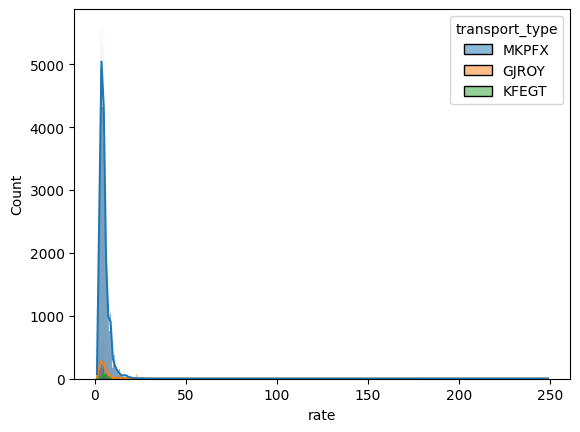

In [56]:
#plt hist of rate column and color by transport_type
sns.histplot(data=train_df, x='rate', hue='transport_type', kde=True)

<Axes: xlabel='log_rate', ylabel='Count'>

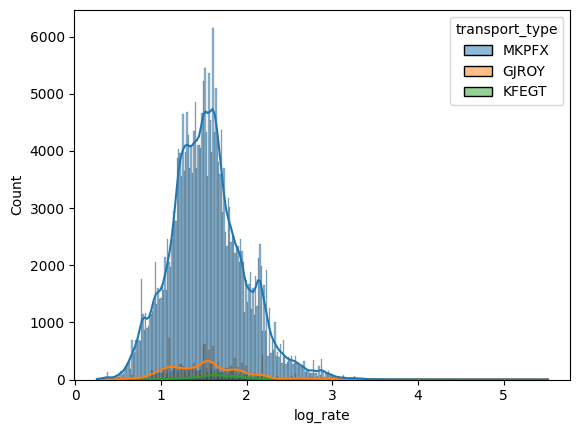

In [57]:
#plt hist of log rate column
train_df['log_rate'] = train_df['rate'].apply(lambda x: np.log(x) if x > 0 else np.nan)
sns.histplot(data=train_df, x='log_rate', hue='transport_type', kde=True)

<Axes: xlabel='pickup_date'>

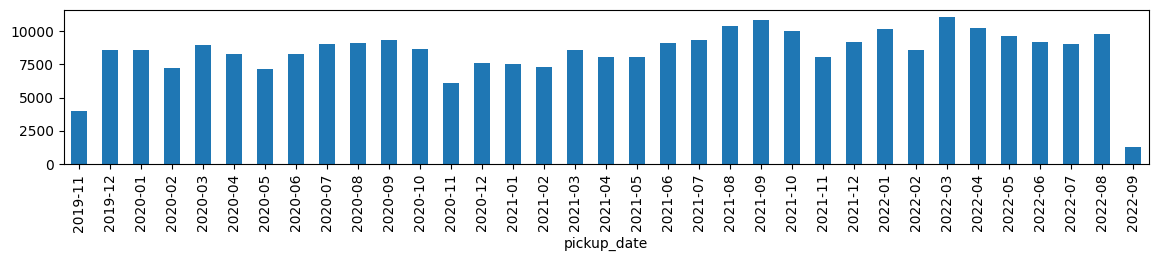

In [58]:
# number of rows by month in train dataset
plt.figure(figsize=(14, 2))
train_df['pickup_date'].apply(lambda x: x[:7]).value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='pickup_date'>

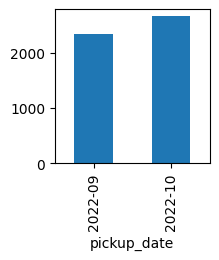

In [59]:
# number of rows by month in test dataset
plt.figure(figsize=(2, 2))
test_df['pickup_date'].apply(lambda x: x[:7]).value_counts().sort_index().plot(kind='bar')

In [60]:
train_df['destination_kma'].isna().sum()

np.int64(0)

In [61]:
# destination_kma unique values 
train_df['destination_kma'].unique()

array(['LFUHN', 'GKKOS', 'DNDBK', 'OMSVL', 'TXLFD', 'UOIXN', 'UXLVW',
       'OIANS', 'XAYQS', 'EQJKI', 'PKGHG', 'NWEJP', 'QWBPO', 'FPZNC',
       'PEXPT', 'NTODX', 'JESUD', 'NUTZC', 'HECXW', 'VJBFX', 'KMMBI',
       'OUHDS', 'GLVAR', 'NPCXM', 'AWWEE', 'ZSLFG', 'IAZJQ', 'DLGVW',
       'OXDKT', 'UKOGN', 'OKWUS', 'PNBXA', 'NSBMC', 'RONUZ', 'MJJOV',
       'NTQBJ', 'GVJCT', 'ZYKLC', 'XYHVH', 'ZSZDM', 'OQOLJ', 'VCEUE',
       'UKWZA', 'MJGXM', 'EKGTE', 'OKPES', 'URQTI', 'WWRQI', 'CFBLH',
       'QUERU', 'RMBXT', 'BQMUZ', 'CTJQI', 'HRQLD', 'BKBAJ', 'QCLHO',
       'KWGZQ', 'IUNUS', 'EWHXH', 'VFWTB', 'BFHYB', 'DUXGP', 'YXTDU',
       'GFKMC', 'RCDSS', 'CXAKM', 'BFTJT', 'AQUVM', 'RUEXZ', 'FKQGG',
       'NHDWT', 'VKUUR', 'VRVHM', 'XNCMK', 'KPOER', 'GRIOF', 'NWGSX',
       'OMUOI', 'YFPKE', 'KFJBP', 'NNJFK', 'WPEEG', 'QGHCU', 'YPKAJ',
       'XXIZJ', 'TNFCQ', 'HQWLT', 'FDBUH', 'LCILG', 'DRRUD', 'DKNNO',
       'RJGHA', 'AVEJW', 'LHDSM', 'TVZUE', 'GLLFQ', 'LKTOK', 'EBAEC',
       'HTFOW', 'HHU

In [62]:
# number of rows by origin_kma and destination_kma in train dataset
train_df['destination_kma'] = train_df['destination_kma'].astype(str)
train_df['origin_kma'] = train_df['origin_kma'].astype(str)
count_df = train_df.groupby(['origin_kma', 'destination_kma']).size().reset_index(name='count')
count_df.sort_values(by='count').tail(10)

,origin_kma,destination_kma,count
2092,HRQLD,KMMBI,2670
1759,GRIOF,NTODX,2873
6173,VCEUE,OMSVL,3469
5096,QWBPO,NTODX,3696
1483,GFKMC,NTODX,3947
6983,YXTDU,NTODX,4158
2429,JESUD,NTODX,4651
4349,OQOLJ,QUERU,6046
4867,QGHCU,QUERU,6221
1384,FPZNC,NTODX,8215


---
## Trying to understand Rate value on example direction

In [63]:
train_df_wo_na = train_df.dropna(subset=['rate', 'weight', 'valid_miles']).copy()
train_df_wo_na = train_df_wo_na[(train_df_wo_na['destination_kma'] == 'QUERU') & (train_df_wo_na['origin_kma'] == 'QGHCU')] # take the most frequent pair

# Calculate rate-based metrics
train_df_wo_na.loc[:, 'rate_per_weight'] = train_df_wo_na['rate'] / train_df_wo_na['weight']
train_df_wo_na.loc[:, 'rate_per_distance'] = train_df_wo_na['rate'] / train_df_wo_na['valid_miles']
train_df_wo_na.loc[:, 'rate_per_weight_and_distance'] = train_df_wo_na['rate'] / (train_df_wo_na['weight'] * train_df_wo_na['valid_miles'])

# Extract year-month from pickup_date
train_df_wo_na.loc[:, 'pickup_date_month'] = train_df_wo_na['pickup_date'].astype(str).str[:7]

# Group by month and calculate mean
monthly_avg_rates = train_df_wo_na.groupby('pickup_date_month')[['rate', 'rate_per_weight', 'rate_per_distance', 'rate_per_weight_and_distance']].mean()

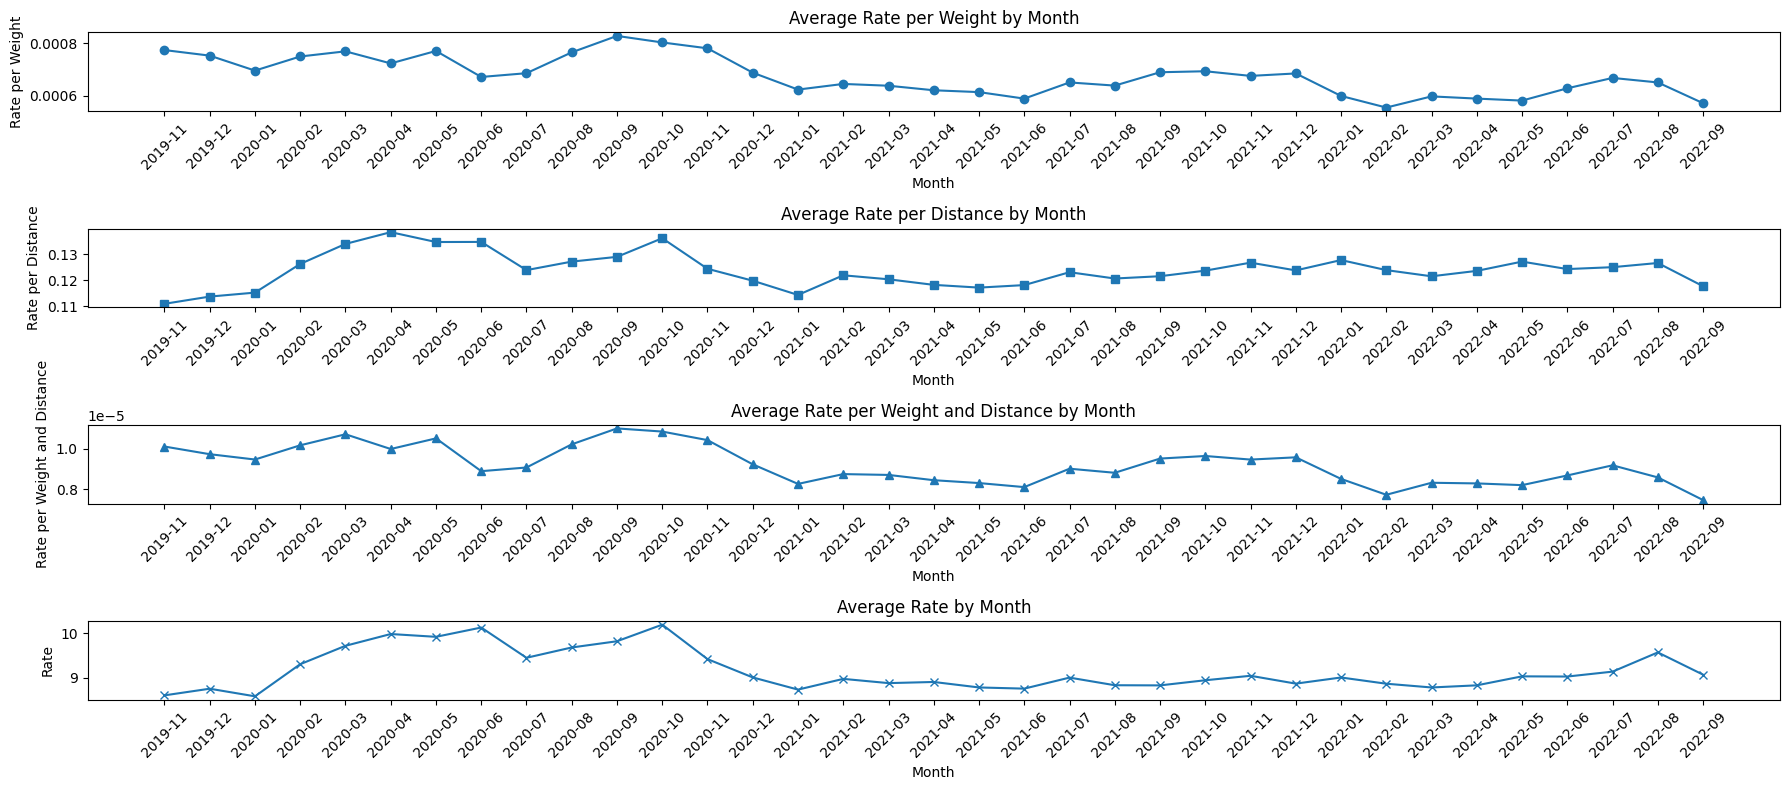

In [64]:
fig, axes = plt.subplots(4, 1, figsize=(18, 8))

# Plot rate per weight
axes[0].plot(monthly_avg_rates.index, monthly_avg_rates['rate_per_weight'], marker='o', linestyle='-')
axes[0].set_title('Average Rate per Weight by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Rate per Weight')
axes[0].tick_params(axis='x', rotation=45)

# Plot rate per distance
axes[1].plot(monthly_avg_rates.index, monthly_avg_rates['rate_per_distance'], marker='s', linestyle='-')
axes[1].set_title('Average Rate per Distance by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Rate per Distance')
axes[1].tick_params(axis='x', rotation=45)

# Plot rate per weight and distance
axes[2].plot(monthly_avg_rates.index, monthly_avg_rates['rate_per_weight_and_distance'], marker='^', linestyle='-')
axes[2].set_title('Average Rate per Weight and Distance by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Rate per Weight and Distance')
axes[2].tick_params(axis='x', rotation=45)

# Plot average rate by month
axes[3].plot(monthly_avg_rates.index, monthly_avg_rates['rate'], marker='x', linestyle='-')
axes[3].set_title('Average Rate by Month')
axes[3].set_xlabel('Month')
axes[3].set_ylabel('Rate')
axes[3].tick_params(axis='x', rotation=45)


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

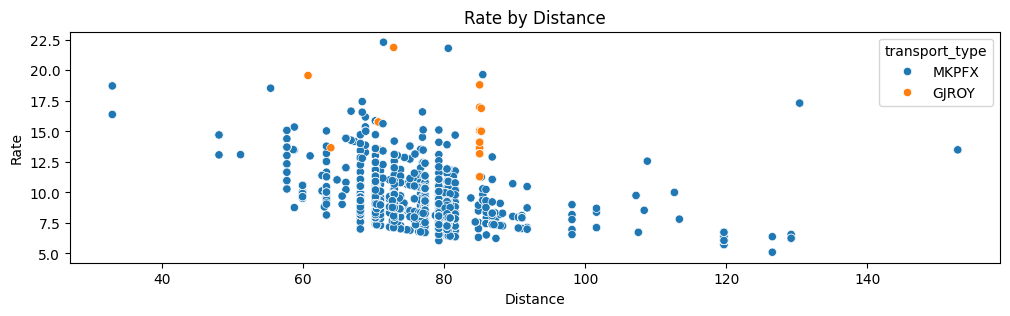

In [65]:
# plot rate_per_weight_and_distance by distance, color by transport_type
plt.figure(figsize=(12, 3))
sns.scatterplot(data=train_df_wo_na, x='valid_miles', y='rate', hue='transport_type')
plt.title('Rate by Distance')
plt.xlabel('Distance')
plt.ylabel('Rate')
plt.show()

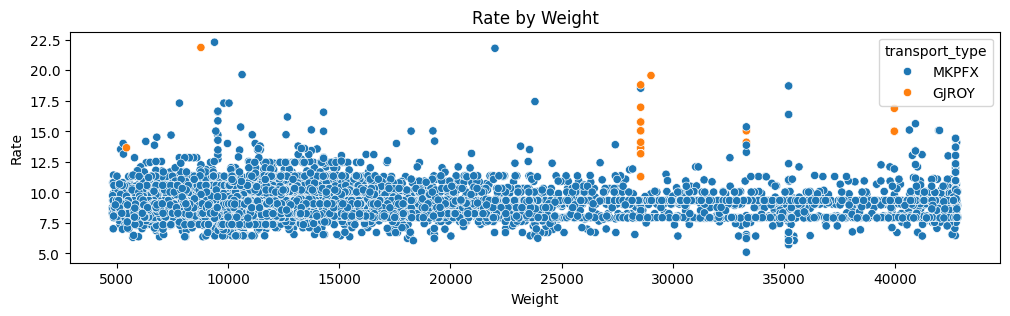

In [66]:
# plot rate_per_weight_and_distance by weight
plt.figure(figsize=(12, 3))
sns.scatterplot(data=train_df_wo_na, x='weight', y='rate', hue='transport_type')
plt.title('Rate by Weight')
plt.xlabel('Weight')
plt.ylabel('Rate')
plt.show()


In [67]:
train_df_wo_na = train_df_wo_na.dropna(subset=['pickup_date'])

# Calculate months to 2022-09
train_df_wo_na['months_to_2022_09'] = (pd.to_datetime('2022-10') - pd.to_datetime(train_df_wo_na['pickup_date'])).dt.days // 30

# Avoid NaN by setting max value correctly
max_months = train_df_wo_na['months_to_2022_09'].max()
if max_months > 0:
    train_df_wo_na['months_to_2022_09_scaled'] = 1 - train_df_wo_na['months_to_2022_09'] / max_months
else:
    train_df_wo_na['months_to_2022_09_scaled'] = 1  

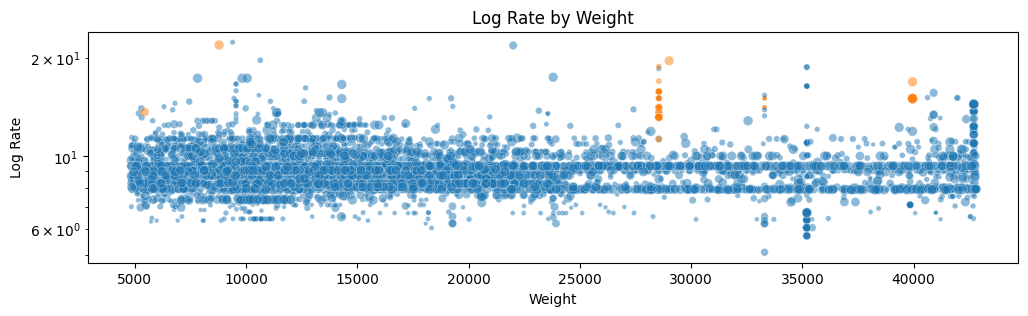

In [68]:
plt.figure(figsize=(12, 3))

# Ensure the scaled column is within [0, 1]
#train_df_wo_na['months_to_2022_09_scaled'].fillna(0, inplace=True)

# Use size instead of alpha
sns.scatterplot(data=train_df_wo_na, x='weight', y='rate',
                hue='transport_type', size='months_to_2022_09_scaled', sizes=(10, 50), alpha=0.5)

plt.title('Log Rate by Weight')
plt.xlabel('Weight')
plt.ylabel('Log Rate')
plt.yscale('log')
# off legend
plt.legend([],[], frameon=False)
plt.show()

```
Looks like Rate doesnt strictly depend from Weight of Distance. There is evidence that for short distances there is small ammount of irreducible price.
```

---
## Check dependicies with PPI (Producers Price Index) Truck Transportationa data
## https://download.bls.gov/pub/time.series/pc/

In [69]:
# read file with tab separated values
transportation_ppi_data = pd.read_csv('dataset/pc.data.39.TruckTransportation.csv', delimiter='\t')
transportation_ppi_data.columns = [col.strip() for col in transportation_ppi_data.columns]  
transportation_ppi_data['series_id'] = transportation_ppi_data['series_id'].apply(lambda x: x.strip())
transportation_ppi_data['month'] = transportation_ppi_data['year'].astype(str) + '-' + transportation_ppi_data['period'].apply(lambda x: str(x)[1:].zfill(2))
print(transportation_ppi_data.describe())
transportation_ppi_data.head(2)

               year         value
count  11111.000000  11111.000000
mean    2012.654127    139.455129
std        7.918224     44.137096
min     1992.000000     83.000000
25%     2007.000000    112.500000
50%     2014.000000    127.700000
75%     2019.000000    150.408500
max     2024.000000    436.338000


,series_id,year,period,value,footnote_codes,month
0,PCU484---484---,2003,M12,100.0,NaN,2003-12
1,PCU484---484---,2004,M01,100.4,NaN,2004-01


In [70]:
# Filtering only general indexL: 484---	Truck transportation
transportation_ppi_data = transportation_ppi_data[transportation_ppi_data['series_id'] == 'PCU484---484---']

In [71]:
monthly_index_df = monthly_avg_rates['rate'].reset_index()
monthly_index_df.columns = ['month', 'rate']
monthly_index_df.head()

,month,rate
0,2019-11,8.611861
1,2019-12,8.759832
2,2020-01,8.590554
3,2020-02,9.305992
4,2020-03,9.715232


In [72]:
monthly_index_df_merged = monthly_index_df.merge(transportation_ppi_data, on='month', how='inner')
monthly_index_df_merged.columns = [col.strip() for col in monthly_index_df_merged.columns]
monthly_index_df_merged.head(2)

,month,rate,series_id,year,period,value,footnote_codes
0,2019-11,8.611861,PCU484---484---,2019,M11,147.7,NaN
1,2019-12,8.759832,PCU484---484---,2019,M12,147.5,NaN


In [73]:
# Bring rate and value to 100% and 2019-11
monthly_index_df_merged['rate_index'] = monthly_index_df_merged['rate'] / monthly_index_df_merged.loc[monthly_index_df_merged['month'] == '2019-11', 'rate'].values[0]
monthly_index_df_merged['value_index'] = monthly_index_df_merged['value'] / monthly_index_df_merged.loc[monthly_index_df_merged['month'] == '2019-11', 'value'].values[0]

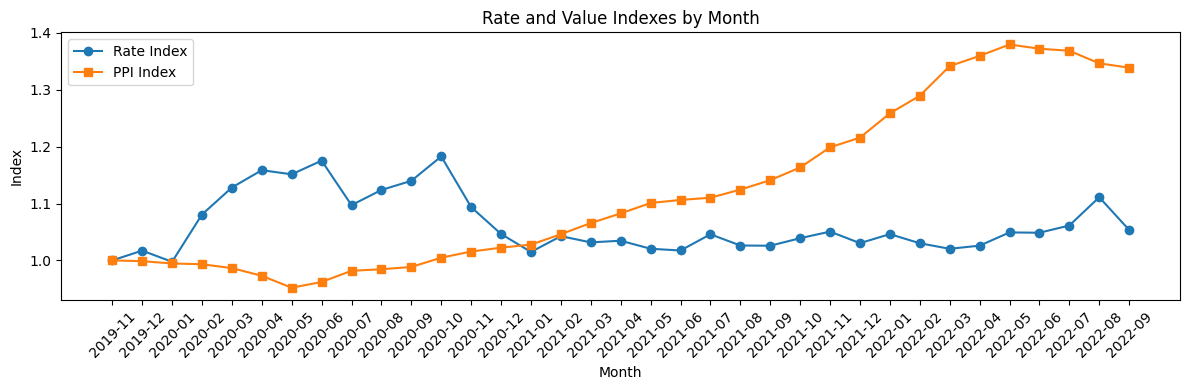

In [74]:
# Plot rate and value indexes on the same plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(monthly_index_df_merged['month'], monthly_index_df_merged['rate_index'], marker='o', linestyle='-', label='Rate Index')
ax.plot(monthly_index_df_merged['month'], monthly_index_df_merged['value_index'], marker='s', linestyle='-', label='PPI Index')
ax.set_title('Rate and Value Indexes by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Index')
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

```
Unfortunaly no correlation with PPI index. But 2021-2022 was pretty stable in terms of Rates
```

---
# Check Freight Transportation Services Index, November 2021 - November 2024

In [75]:
# https://www.bts.gov/newsroom/freight-transportation-services-index-november-2021-november-2024
data = {
    "month": [
        "Nov-21", "Dec-21", "Jan-22", "Feb-22", "Mar-22", "Apr-22", "May-22", 
        "Jun-22", "Jul-22", "Aug-22", "Sep-22", "Oct-22", "Nov-22"
    ],
    "ts_index": [136.3, 136.7, 137.4, 138.7, 139.8, 139.0, 138.7, 139.1, 138.2, 139.0, 139.5, 137.9, 135.5]
}

# Convert to DataFrame
transp_serv_index_df = pd.DataFrame(data)

# Convert month to datetime format and extract year and period
transp_serv_index_df["month"] = pd.to_datetime(transp_serv_index_df["month"], format="%b-%y")
transp_serv_index_df["month"] = transp_serv_index_df["month"].dt.strftime('%Y-%m')
transp_serv_index_df["ts_index"] = transp_serv_index_df["ts_index"] / 100
transp_serv_index_df.head()

,month,ts_index
0,2021-11,1.363
1,2021-12,1.367
2,2022-01,1.374
3,2022-02,1.387
4,2022-03,1.398


In [76]:
monthly_index_df_merged = monthly_index_df_merged.merge(transp_serv_index_df, on='month', how='inner')
monthly_index_df_merged.head(2)

,month,rate,series_id,year,period,value,footnote_codes,rate_index,value_index,ts_index
0,2021-11,9.047526,PCU484---484---,2021,M11,177.063,NaN,1.050589,1.198802,1.363
1,2021-12,8.873129,PCU484---484---,2021,M12,179.575,NaN,1.030338,1.215809,1.367


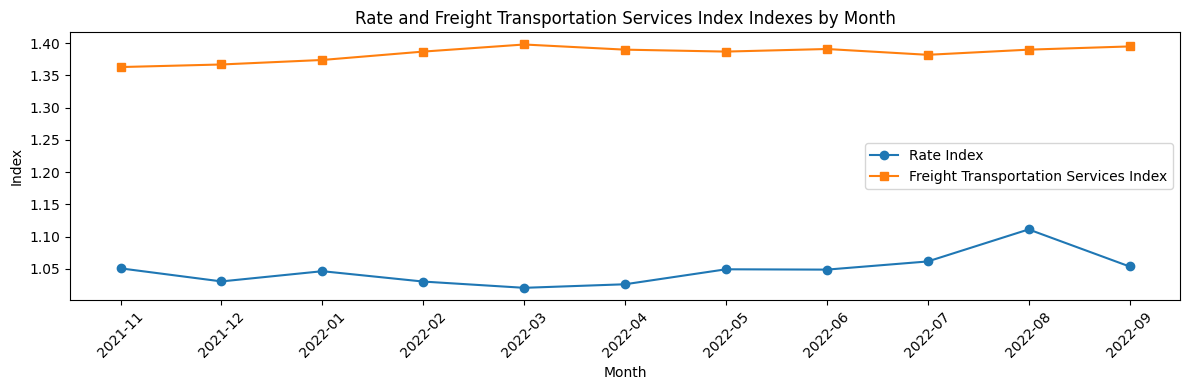

In [79]:
# Plot rate and value indexes on the same plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(monthly_index_df_merged['month'], monthly_index_df_merged['rate_index'], marker='o', linestyle='-', label='Rate Index')
ax.plot(monthly_index_df_merged['month'], monthly_index_df_merged['ts_index'], marker='s', linestyle='-', label='Freight Transportation Services Index')
ax.set_title('Rate and Freight Transportation Services Index Indexes by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Index')
ax.tick_params(axis='x', rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

---
## Hourly and Dayly distribution

In [77]:
train_df_wo_na['hour'] = train_df_wo_na['pickup_date'].apply(lambda x: pd.to_datetime(x).hour)
train_df_wo_na['dayofweek'] = train_df_wo_na['pickup_date'].apply(lambda x: pd.to_datetime(x).dayofweek)

# Group by hour and day of week
hourly_avg_rates = train_df_wo_na.groupby(['hour', 'dayofweek'])['rate'].mean().reset_index()
hourly_data = hourly_avg_rates.groupby('hour', as_index=False)['rate'].mean()
dow_data = hourly_avg_rates.groupby('dayofweek', as_index=False)['rate'].mean()

# Map numeric day_of_week to string labels
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
           3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dow_data['dayofweek_str'] = dow_data['dayofweek'].map(day_map)

# Define the order for day-of-week
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


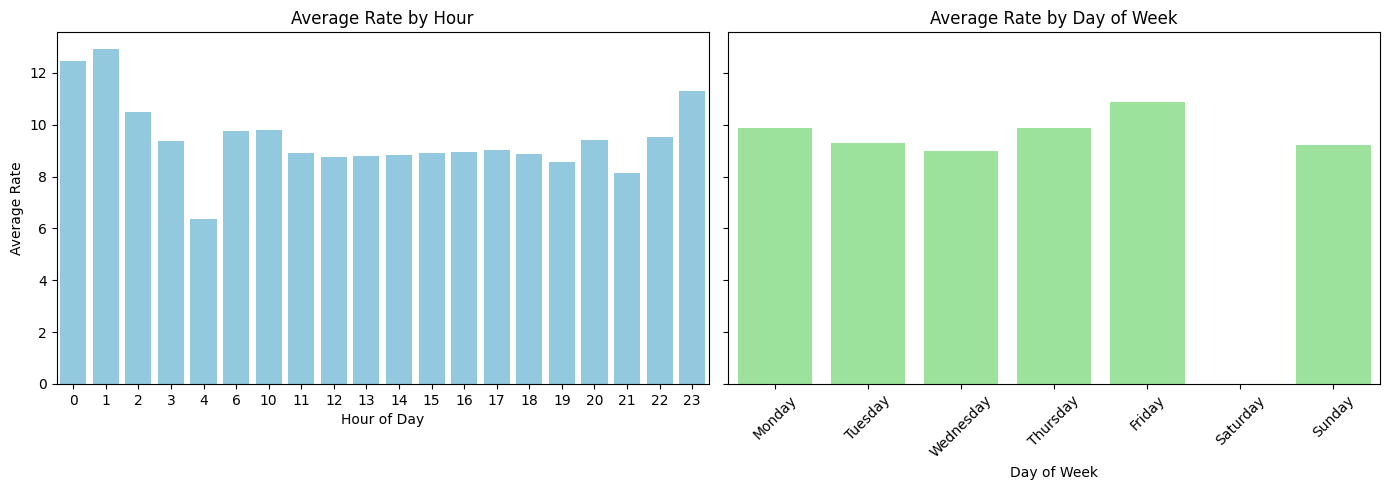

In [78]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.barplot(ax=axes[0], data=hourly_data, x='hour', y='rate', color='skyblue')
axes[0].set_title('Average Rate by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Rate')

sns.barplot(ax=axes[1], data=dow_data, x='dayofweek_str', y='rate', order=dayofweek_order, color='lightgreen')
axes[1].set_title('Average Rate by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('')

for label in axes[1].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()